<a href="https://colab.research.google.com/github/mattpolands/GlobalBurdenDisease/blob/main/GlobalBurdenofDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring and working with published data from the Global Burden of Disease study started by the World Health Organization (WHO) and continued by the Institute of Health Metrics and Evaluation (IHME). Dataset supplied by Our World in Data.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('cause_of_deaths.csv')

In [4]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [40]:
#Nice clean dataset
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [8]:
#Create new column for total number of deaths
death_total = [col for col in df.columns if col not in ['Country', 'Code', 'Year']]
df['Death Toll'] = df[death_total].sum(axis=1)
df.head()

<ipython-input-8-a2715a86e671>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Death Toll'] = df[death_total].sum(axis=1)


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Death Toll
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795


In [41]:
#Death total from each disease
#A dizzying amount of death, led by CV disease (a near two length lead!)
disease_df = df[death_total].sum().to_frame().reset_index()
disease_df.rename(columns={"index": "Disease", 0:"Total Cases"}, inplace=True)
disease_df.drop(index=disease_df.index[0], inplace=True)
disease_df

,Disease,Total Cases
1,Meningitis,10524572
2,Alzheimer's Disease and Other Dementias,29768839
3,Parkinson's Disease,7179795
4,Nutritional Deficiencies,13792032
5,Malaria,25342676
6,Drowning,10301999
7,Interpersonal Violence,12752839
8,Maternal Disorders,7727046
9,HIV/AIDS,36364419
10,Drug Use Disorders,2656121


In [42]:
#Total number of deaths per country
#Appears to be a clear and understandable correlation between population size and death totals
country_df = df.groupby('Country/Territory')['Death Toll'].sum().sort_values(ascending=False).reset_index()
country_df

,Country/Territory,Death Toll
0,China,265408106
1,India,238158165
2,United States,71197802
3,Russia,59591155
4,Indonesia,44046941
...,...,...
199,Cook Islands,3999
200,Tuvalu,2962
201,Nauru,2249
202,Niue,591


In [11]:
#Total deaths by year
deaths_by_year = df.groupby('Year')['Death Toll'].sum().reset_index()
deaths_by_year

,Year,Death Toll
0,1990,43518516
1,1991,44059729
2,1992,44459130
3,1993,45185713
4,1994,46182613
5,1995,46177018
6,1996,46320827
7,1997,46672370
8,1998,47066088
9,1999,47652090


In [12]:
#Group years with country and measure yearly death totals
df_country_group = df.groupby(['Country/Territory','Year']).sum()
df_country_group

<ipython-input-12-8ad16df488f4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_group = df.groupby(['Country/Territory','Year']).sum()


Meningitis  Alzheimer's Disease and Other Dementias  \
Country/Territory Year                                                        
Afghanistan       1990        2159                                     1116   
                  1991        2218                                     1136   
                  1992        2475                                     1162   
                  1993        2812                                     1187   
                  1994        3027                                     1211   
...                            ...                                      ...   
Zimbabwe          2015        1439                                      754   
                  2016        1457                                      767   
                  2017        1460                                      781   
                  2018        1450                                      795   
                  2019        1450                                      812   

                        Parkinson's Disease  Nutritional Deficiencies  \
Country/Territory Year                                                  
Afghanistan       1990                  371                      2087   
                  1991                  374                      2153   
                  1992                  378                      2441   
                  1993                  384                      2837   
                  1994                  391                      3081   
...                                     ...                       ...   
Zimbabwe          2015                  215                      3019   
                  2016                  219                      3056   
                  2017                  223                      2990   
                  2018                  227                      2918   
                  2019                  232                      2884   

                        Malaria  Drowning  Interpersonal Violence  \
Country/Territory Year                                              
Afghanistan       1990       93      1370                    1538   
                  1991      189      1391                    2001   
                  1992      239      1514                    2299   
                  1993      108      1687                    2589   
                  1994      211      1809                    2849   
...                         ...       ...                     ...   
Zimbabwe          2015     2518       770                    1302   
                  2016     2050       801                    1342   
                  2017     2116       818                    1363   
                  2018     2088       825                    1396   
                  2019     2068       827                    1434   

                        Maternal Disorders  HIV/AIDS  Drug Use Disorders  ...  \
Country/Territory Year                                                    ...   
Afghanistan       1990                2655        34                  93  ...   
                  1991                2885        41                 102  ...   
                  1992                3315        48                 118  ...   
                  1993                3671        56                 132  ...   
                  1994                3863        63                 142  ...   
...                                    ...       ...                 ...  ...   
Zimbabwe          2015                1355     29162                 104  ...   
                  2016                1338     27141                 110  ...   
                  2017                1312     24846                 115  ...   
                  2018                1294     22106                 121  ...   
                  2019                1294     20722                 127  ...   

                        Chronic Kidney Disease  Poisonings  \
Country/Territory Year          

In [14]:
#Top ten countries by total death
top_10 = df.groupby('Country/Territory')['Death Toll'].sum().sort_values(ascending=False).head(10).reset_index()
top_10

,Country/Territory,Death Toll
0,China,265408106
1,India,238158165
2,United States,71197802
3,Russia,59591155
4,Indonesia,44046941
5,Nigeria,43670014
6,Pakistan,38151878
7,Brazil,32674112
8,Japan,31922807
9,Germany,25559667


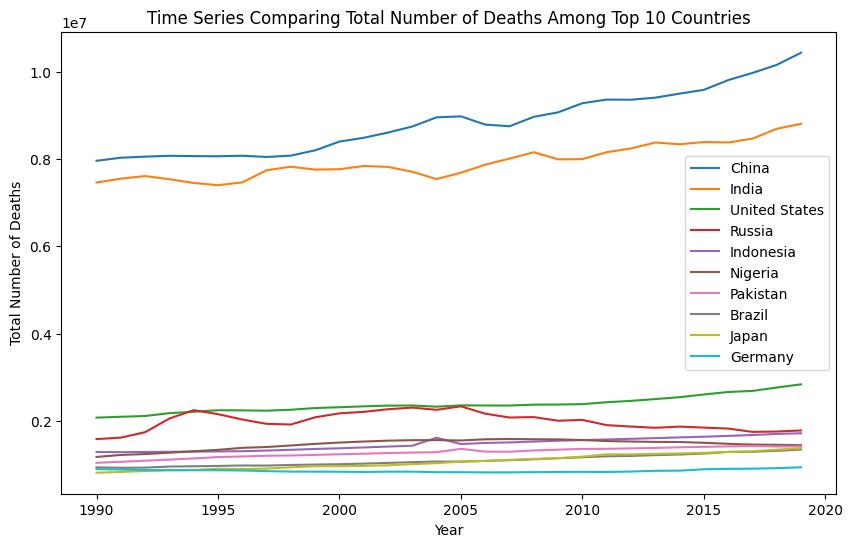

In [43]:
#Timeseries of death for the countries with highest number of death
#Shows a relatively steady state that appears to climb in proportionately with growing populations
plt.figure(figsize=(10,6))

for i in top_10['Country/Territory']:
    a = df[df['Country/Territory']==i]
    sns.lineplot(data=a, x='Year', y='Death Toll', label=i)

plt.xlabel('Year',fontsize =10)
plt.ylabel('Total Number of Deaths',fontsize =10)
plt.title('Time Series Comparing Total Number of Deaths Among Top 10 Countries', fontsize=12)
plt.legend()
plt.show()

In [44]:
#Top causes of death
reapers_top_henchmen = disease_df.groupby('Disease')['Total Cases'].sum().sort_values(ascending=False).head(10).reset_index()
reapers_top_henchmen

,Disease,Total Cases
0,Cardiovascular Diseases,447741982
1,Neoplasms,229758538
2,Chronic Respiratory Diseases,104605334
3,Lower Respiratory Infections,83770038
4,Neonatal Disorders,76860729
5,Diarrheal Diseases,66235508
6,Digestive Diseases,65638635
7,Tuberculosis,45850603
8,Cirrhosis and Other Chronic Liver Diseases,37479321
9,HIV/AIDS,36364419


In [45]:
#Visualizing with plotly, the top 10 causes of death on earth
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=reapers_top_henchmen['Disease'],
                             values=reapers_top_henchmen['Total Cases'],
                             hole=.9,
                             title = 'Top 10 Causes of Death')])

fig.update_layout(title='Top 10 Causes of Death on Earth',title_x=0.5, font_size=15, showlegend = False)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [46]:
#Visualizing with plotly express, the top 10 causes of death on earth
fig = px.pie(reapers_top_henchmen, names = 'Disease' , values = 'Total Cases',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Top 10 Causes of Death on Earth',
                  title_x=0.5, title_y=0.99, width=600, height=400,
                  margin=dict(t=25, b=0, l=0, r=0))
fig.update(layout_showlegend=False)

In [47]:
#Grouping top killers by year in preparation for a time series visualization
TS_CV = df.groupby('Year')['Cardiovascular Diseases'].sum().sort_values(ascending=False).reset_index()
TS_Neo = df.groupby('Year')['Neoplasms'].sum().sort_values(ascending=False).reset_index()
TS_CRD = df.groupby('Year')['Chronic Respiratory Diseases'].sum().sort_values(ascending=False).reset_index()
TS_LLD = df.groupby('Year')['Lower Respiratory Infections'].sum().sort_values(ascending=False).reset_index()
TS_Neonat = df.groupby('Year')['Neonatal Disorders'].sum().sort_values(ascending=False).reset_index()
TS_Diarrhea = df.groupby('Year')['Diarrheal Diseases'].sum().sort_values(ascending=False).reset_index()
TS_DD = df.groupby('Year')['Digestive Diseases'].sum().sort_values(ascending=False).reset_index()
TS_TB = df.groupby('Year')['Tuberculosis'].sum().sort_values(ascending=False).reset_index()
TS_LD = df.groupby('Year')['Cirrhosis and Other Chronic Liver Diseases'].sum().sort_values(ascending=False).reset_index()
TS_HIV = df.groupby('Year')['HIV/AIDS'].sum().sort_values(ascending=False).reset_index()


In [48]:
#Visualizing time series of the top 9 mortal pathologies
#9 instead of 10 due to color scheme and overcrowding, 8 might be better
#Potential decline in the top 3-9, but 1 and 2 interestingly appear to increase (worthy of further investigation)
fig = go.Figure()
fig.add_trace(go.Scatter(x = TS_CV['Year'],
                         y = TS_CV['Cardiovascular Diseases'],
                         mode = 'lines',
                         name = 'Cardiovascular Diseases',
                         marker_color = 'Crimson',
                         line = dict(dash = 'solid')))

fig.add_trace(go.Scatter(x = TS_Neo['Year'],
                         y = TS_Neo['Neoplasms'],
                         mode = 'lines',
                         name = 'Neoplasms',
                         marker_color = 'White',
                         line = dict(dash = 'solid')))

fig.add_trace(go.Scatter(x = TS_CRD['Year'],
                         y = TS_CRD['Chronic Respiratory Diseases'],
                         mode = 'lines',
                         name = 'Chronic Respiratory Diseases',
                         marker_color = 'RoyalBlue',
                         line = dict(dash = 'solid')))

fig.add_trace(go.Scatter(x = TS_LLD['Year'],
                         y = TS_LLD["Lower Respiratory Infections"],
                         mode = 'lines',
                         name = "Lower Respiratory Infections",
                         marker_color = 'Magenta',
                         line = dict(dash = 'solid')))


fig.add_trace(go.Scatter(x = TS_Neonat['Year'],
                         y = TS_Neonat['Neonatal Disorders'],
                         mode = 'lines',
                         name = 'Neonatal Disorders',
                         marker_color = 'Orange',
                         line = dict(dash = 'solid')))

fig.add_trace(go.Scatter(x = TS_Diarrhea['Year'],
                         y = TS_Diarrhea['Diarrheal Diseases'],
                         mode = 'lines',
                         name = 'Diarrheal Diseases',
                         marker_color = 'Lime',
                         line = dict(dash = 'solid')))

fig.add_trace(go.Scatter(x = TS_DD['Year'],
                         y = TS_DD['Digestive Diseases'],
                         mode = 'lines',
                         name = 'Digestive Diseases',
                         marker_color = 'Gold',
                         line = dict(dash = 'solid')))

fig.add_trace(go.Scatter(x = TS_TB['Year'],
                         y = TS_TB['Tuberculosis'],
                         mode = 'lines',
                         name = 'Tuberculosis',
                         marker_color = 'LightSeaGreen',
                         line = dict(dash = 'solid')))

fig.add_trace(go.Scatter(x = TS_LD['Year'],
                         y = TS_LD['Cirrhosis and Other Chronic Liver Diseases'],
                         mode = 'lines',
                         name = 'Cirrhosis and Other Chronic Liver Diseases',
                         marker_color = 'Purple',
                         line = dict(dash = 'solid')))

fig.update_layout(title = '<b>Time Series of Top 9 Causes of Death on Earth<b>',
                  title_x = 0.5,
                  title_font= dict(size = 20),
                  xaxis_title = 'Year',
                  yaxis_title = 'Total Number of Deaths',
                  template = 'plotly_dark')

fig.show()

In [49]:
#Looking at some aspects of mental illness and other environmenatal factors that lead to abundance of human death
#Prep for timeseries
TS_Drown = df.groupby('Year')['Drowning'].sum().sort_values(ascending=False).reset_index()
TS_Violence = df.groupby('Year')['Interpersonal Violence'].sum().sort_values(ascending=False).reset_index()
TS_Drugs = df.groupby('Year')['Drug Use Disorders'].sum().sort_values(ascending=False).reset_index()
TS_Alcohol = df.groupby('Year')['Alcohol Use Disorders'].sum().sort_values(ascending=False).reset_index()
TS_Envi = df.groupby('Year')['Environmental Heat and Cold Exposure'].sum().sort_values(ascending=False).reset_index()
TS_Fire = df.groupby('Year')['Fire, Heat, and Hot Substances'].sum().sort_values(ascending=False).reset_index()
TS_Poison = df.groupby('Year')['Poisonings'].sum().sort_values(ascending=False).reset_index()


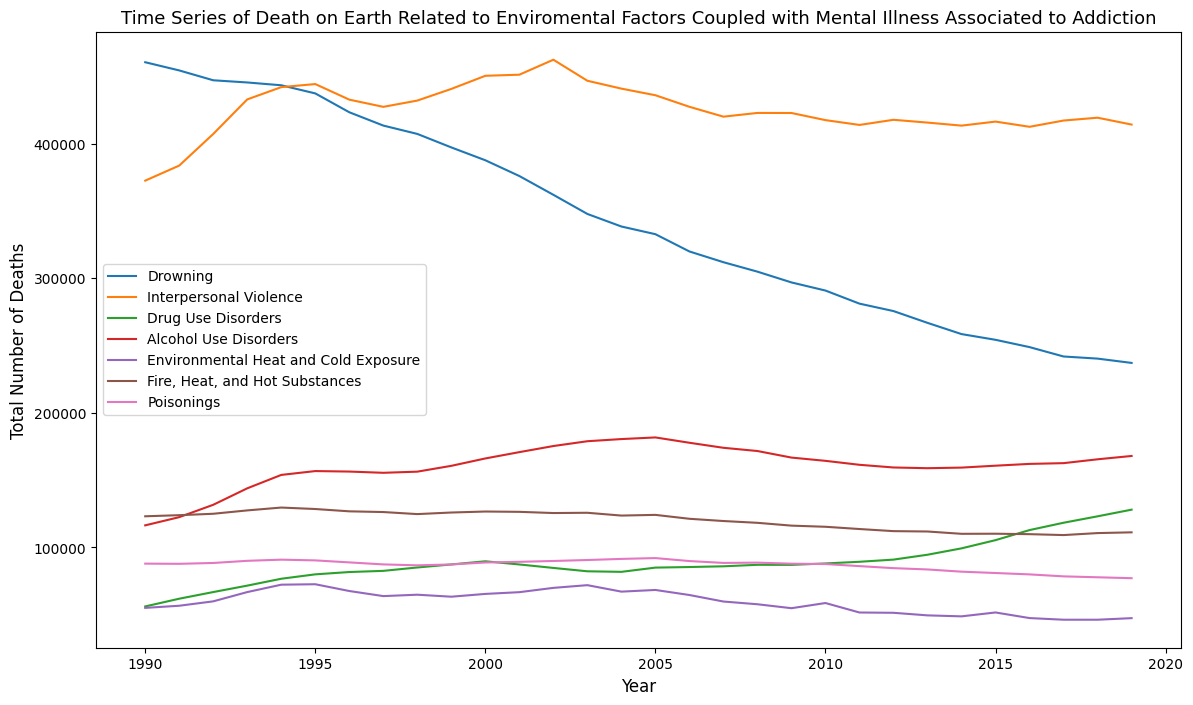

In [51]:
#Death by environmental factors and addiction (EFaA)
#Timeseries visualization
#Drowning appears to be on the decline (What is the root cause? A feature that can be applied to these other factors?)
#Death from drug use appears to be on the rise (Why?)
EFaA_death = [TS_Drown, TS_Violence, TS_Drugs, TS_Alcohol, TS_Envi, TS_Fire, TS_Poison]

plt.figure(figsize=(14,8))

for cause_df in EFaA_death:
    sns.lineplot(data = cause_df,
                 x = 'Year',
                 y = cause_df.columns[1],
                 label = cause_df.columns[1]
                )

plt.xlabel('Year',fontsize =12)
plt.ylabel('Total Number of Deaths',fontsize =12)
plt.title('Time Series of Death on Earth Related to Enviromental Factors Coupled with Mental Illness Associated to Addiction', fontsize=13)
plt.legend()
plt.show()

In [52]:
countries_top_death_cause = df.drop(columns=['Country/Territory', 'Code', 'Year', 'Death Toll'])
countries_top_horseperson = countries_top_death_cause.idxmax(axis=1)
df['Top Cause'] = countries_top_horseperson

In [55]:
#Looking for trends
fig = px.choropleth(df,
              locations="Code",
              color="Top Cause",
              color_continuous_scale='Plasma',
              hover_name="Country/Territory",
              animation_frame="Year",
              width=800
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()